<a href="https://colab.research.google.com/github/arcadiopfz/Projeto-Final/blob/main/Etapa_4_Deep_Learning_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 4 - Análise dos preços da ação Petro Rio SA (PRIO3) por meio de Redes Neurais LSTM

# 1. Carregar e tratar a base de dados

In [ ]:
import pandas as pd
#Fonte dos dados: https://br.investing.com/equities/hrt-petroleo-on-nm-historical-data
dataset = pd.read_csv('/content/PRIO3 Dados Históricos.csv', usecols=['Data', 'Último'])
dataset

,Data,Último
0,29.12.2022,"37,21"
1,28.12.2022,"37,25"
2,27.12.2022,"35,58"
3,26.12.2022,"35,44"
4,23.12.2022,"35,49"
...,...,...
1963,23.01.2015,"0,63"
1964,22.01.2015,"0,63"
1965,21.01.2015,"0,44"
1966,20.01.2015,"0,33"


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1968 non-null   object
 1   Último  1968 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


In [ ]:
dataset['Último'] = dataset['Último'].apply(lambda x: str(x).replace(",","."))

In [ ]:
dataset

,Data,Último
0,29.12.2022,37.21
1,28.12.2022,37.25
2,27.12.2022,35.58
3,26.12.2022,35.44
4,23.12.2022,35.49
...,...,...
1963,23.01.2015,0.63
1964,22.01.2015,0.63
1965,21.01.2015,0.44
1966,20.01.2015,0.33


In [ ]:
df1=dataset.reset_index()['Último']

In [ ]:
df1

0       37.21
1       37.25
2       35.58
3       35.44
4       35.49
        ...  
1963     0.63
1964     0.63
1965     0.44
1966     0.33
1967     0.29
Name: Último, Length: 1968, dtype: object

Reverse rows and columns

In [ ]:
df1.loc[::-1]

1967     0.29
1966     0.33
1965     0.44
1964     0.63
1963     0.63
        ...  
4       35.49
3       35.44
2       35.58
1       37.25
0       37.21
Name: Último, Length: 1968, dtype: object

In [ ]:
df2 = df1.loc[::-1].reset_index(drop=True)

In [ ]:
df2

0        0.29
1        0.33
2        0.44
3        0.63
4        0.63
        ...  
1963    35.49
1964    35.44
1965    35.58
1966    37.25
1967    37.21
Name: Último, Length: 1968, dtype: object

In [ ]:
df2

0        0.29
1        0.33
2        0.44
3        0.63
4        0.63
        ...  
1963    35.49
1964    35.44
1965    35.58
1966    37.25
1967    37.21
Name: Último, Length: 1968, dtype: object

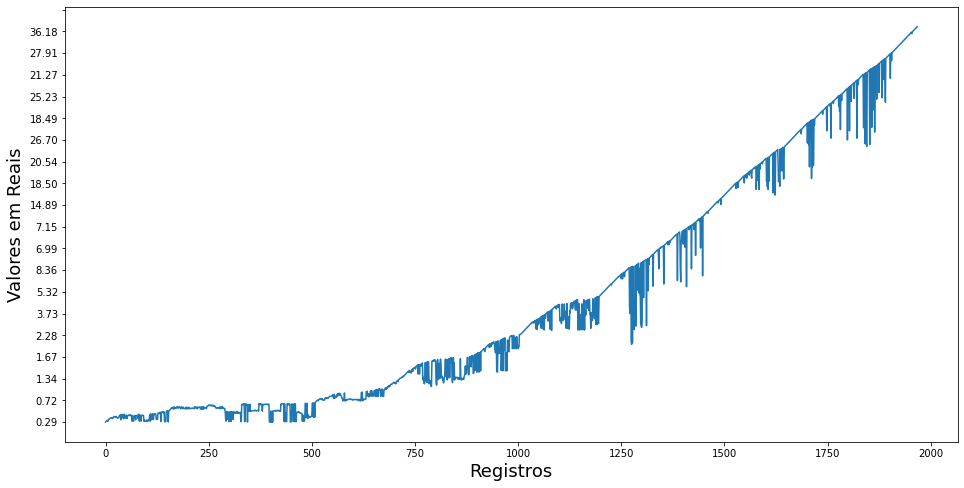

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,8))
plt.xlabel('Registros', fontsize=18)
plt.ylabel('Valores em Reais', fontsize= 18)
plt.yticks(np.arange(-50, 1000, 50))
plt.plot(df2);

# 3. Normalização (MinMaxScaler) e formatando o array

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [ ]:
df2

array([[0.00391032],
       [0.00495308],
       [0.00782065],
       ...,
       [0.92387904],
       [0.96741397],
       [0.96637122]])

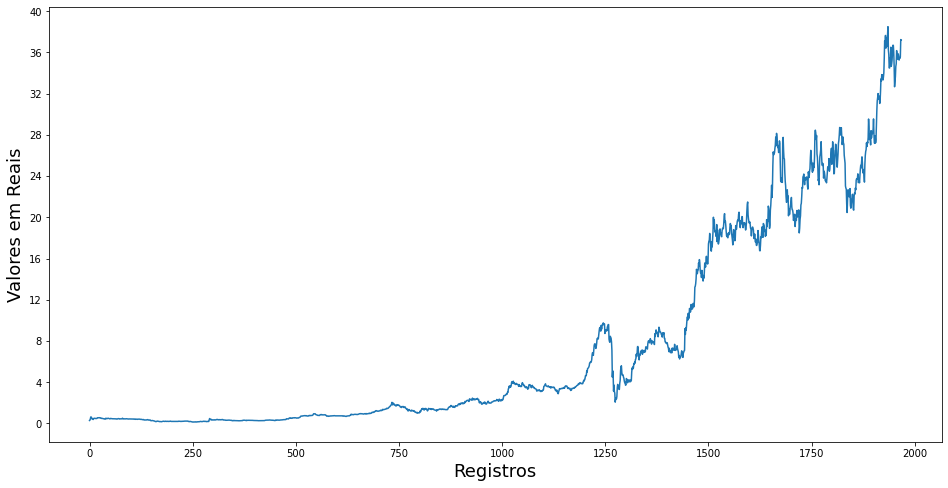

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Registros', fontsize=18)
plt.yticks(np.arange(0, 42, 4))
plt.ylabel('Valores em Reais', fontsize= 18)
plt.plot(scaler.inverse_transform(df2));

# 4. Separar base em treino, teste e criar um array

In [ ]:
training_size=int(len(df2)*0.80)
#test_size=len(df2)-training_size
test_size=int(len(df2)*0.20)
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [ ]:
training_size,test_size

(1574, 393)

In [ ]:
train_data

array([[0.00391032],
       [0.00495308],
       [0.00782065],
       ...,
       [0.51068822],
       [0.5088634 ],
       [0.52502607]])

In [ ]:
test_data

array([[0.53076121],
       [0.50990615],
       [0.5       ],
       [0.49165798],
       [0.50521376],
       [0.50964546],
       [0.50156413],
       [0.5198123 ],
       [0.51903024],
       [0.49530761],
       [0.49165798],
       [0.50260688],
       [0.50026069],
       [0.5044317 ],
       [0.50338895],
       [0.49374348],
       [0.48566215],
       [0.4911366 ],
       [0.5044317 ],
       [0.53180396],
       [0.55057351],
       [0.55656934],
       [0.52398332],
       [0.51355579],
       [0.50677789],
       [0.50312826],
       [0.50651721],
       [0.50078206],
       [0.49035454],
       [0.48774765],
       [0.47080292],
       [0.48644421],
       [0.49165798],
       [0.49322211],
       [0.49035454],
       [0.48514077],
       [0.46428571],
       [0.46558916],
       [0.47549531],
       [0.46167883],
       [0.45490094],
       [0.46298227],
       [0.44734098],
       [0.44655892],
       [0.45177268],
       [0.45464025],
       [0.48435871],
       [0.473

# 5. Converter os valores do array para um dataset matrix

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 5.1. Análise de 10 dias (time_step  = 10) para o valor que será previsto

In [ ]:
time_step = 10
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(1563, 10)
(1563,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(383, 10)
(383,)


(None, None)

## 5.2. Remodalar input para o LSTM.

O input do LSTM é sempre um 3D array -->  (batch_size, time_steps, seq_len)

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
print(x_train.shape), print(x_test.shape)

(1563, 10, 1)
(383, 10, 1)


(None, None)

# 6. Rede Neural Long Short-Term Memory Network - LSTM

# 6.1. Criando a Rede Neural 

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(64,return_sequences=True))
model.add(Dense(32,activation='relu'))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            33024     
                                                                 
 dense (Dense)               (None, 10, 32)            2080      
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 76,897
Trainable params: 76,897
Non-trainable params: 0
_________________________________________________________________


# 6.2. Treinamento da Rede Neural

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
                          epochs=10,
                          batch_size=3,
                          verbose=1)

Epoch 1/10
521/521 [==============================] - 17s 19ms/step - loss: 0.0011 - mean_absolute_error: 0.0186 - val_loss: 0.0060 - val_mean_absolute_error: 0.0591
Epoch 2/10
521/521 [==============================] - 8s 16ms/step - loss: 3.5672e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0069 - val_mean_absolute_error: 0.0641
Epoch 3/10
521/521 [==============================] - 7s 14ms/step - loss: 2.8935e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0120 - val_mean_absolute_error: 0.0915
Epoch 4/10
521/521 [==============================] - 8s 15ms/step - loss: 3.5720e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0096 - val_mean_absolute_error: 0.0764
Epoch 5/10
521/521 [==============================] - 7s 14ms/step - loss: 2.7676e-04 - mean_absolute_error: 0.0105 - val_loss: 0.0031 - val_mean_absolute_error: 0.0451
Epoch 6/10
521/521 [==============================] - 7s 14ms/step - loss: 2.5772e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0042 - val_mean_absolute_err

# 7. Avaliação da Rede Neural

7.1. Gráfico do treinamento: custo do treino

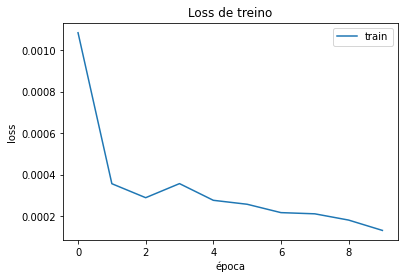

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.title('Loss de treino')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

In [ ]:
score = model.evaluate(x_train, y_train, verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1], '%')

Test score: 6.974200368858874e-05
Test mape: 0.004680872894823551 %


## 7.2. Fazendo predict com nosso modelo

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

12/12 [==============================] - 0s 10ms/step


In [ ]:
train_predict

array([[0.00519462],
       [0.00566674],
       [0.00655536],
       ...,
       [0.4957763 ],
       [0.5008967 ],
       [0.50531596]], dtype=float32)

## 7.3. Retorna à escala normal para cálculo das métricas (de 0 até 40)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
train_predict

array([[ 0.33926553],
       [ 0.35737616],
       [ 0.39146346],
       ...,
       [19.157978  ],
       [19.354397  ],
       [19.52392   ]], dtype=float32)

In [ ]:
test_predict

array([[19.88954 ],
       [19.693027],
       [19.616543],
       [19.601381],
       [19.644411],
       [19.674063],
       [19.615412],
       [19.48083 ],
       [19.374176],
       [19.414698],
       [19.720497],
       [20.173378],
       [20.582508],
       [20.636581],
       [20.465895],
       [20.23235 ],
       [20.040358],
       [19.956398],
       [19.89267 ],
       [19.76158 ],
       [19.591269],
       [19.310518],
       [19.16026 ],
       [19.165422],
       [19.225216],
       [19.255802],
       [19.218275],
       [19.000345],
       [18.777922],
       [18.701187],
       [18.600647],
       [18.464273],
       [18.384499],
       [18.229599],
       [18.063242],
       [17.97292 ],
       [17.957455],
       [18.210085],
       [18.40926 ],
       [18.396801],
       [18.247097],
       [17.962856],
       [17.69235 ],
       [17.632908],
       [17.840616],
       [18.073711],
       [18.360071],
       [18.640589],
       [18.829746],
       [18.773993],


In [ ]:
print(train_predict.shape), print(test_predict.shape)

(1563, 1)
(383, 1)


(None, None)

# 8. Visualizar os resultados de treino e teste

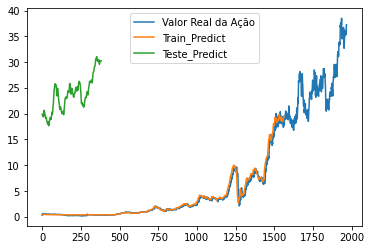

In [ ]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predict)
plt.plot(test_predict)
plt.legend(['Valor Real da Ação','Train_Predict','Teste_Predict'])
plt.show()

## 8.1. Deslocar o test prediction para visualizar no gráfico 

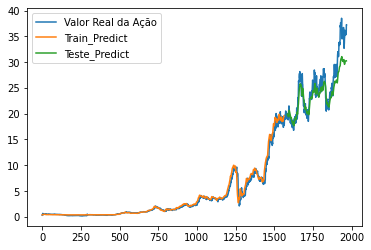

In [ ]:
look_back=10

testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(train_predict)
plt.plot(testPredictPlot)
plt.legend(['Valor Real da Ação','Train_Predict','Teste_Predict'])
plt.show()

# 9. Métricas de avaliação 


9.1. RSME (Root mean square error) 
* Calcula a média das diferenças entre os values predicted e observações reais ao quadrado

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rsme_train = math.sqrt(mean_squared_error(y_train,train_predict))
rsme_test = math.sqrt(mean_squared_error(y_test,test_predict))
print('RSME do train: ',rsme_train)
print('RSME do test: ',rsme_test)

RSME do train:  5.634125887401881
RSME do test:  23.332523231891013


9.2. MAE - Mean Absolute Error 

*   Calcula o erro absoluto médio, que consiste em calcular o residual de cada ponto, onde valores residuais negativos e positivos não se anulam e após o agrupamento é calculada a média dos residuais. 




In [ ]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train,train_predict)
mae_test = mean_absolute_error(y_test,test_predict)
print('MAE do train: ',mae_train)
print('MAE do test: ',mae_test)

MAE do train:  3.3641619172736656
MAE do test:  23.105822809464396


9.3. MSE - Mean Squared Error



*   Calcula a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.




In [ ]:
mse_train = mean_squared_error(y_train,train_predict)
mse_test = mean_squared_error(y_test,test_predict)
print('MSE do train: ',mse_train)
print('MSE do test: ',mse_test)

MSE do train:  31.74337451509203
MSE do test:  544.4066403667338


9.4. MAPE — Mean Absolute Percentage Error

*   Usada em relatórios de gerenciamento, porque o erro é medido como uma porcentagem e assim, é possível fazer comparações entre erros percentuais do modelo entre produtos.




In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_train = mean_absolute_percentage_error(y_train,train_predict)
mean_test = mean_absolute_percentage_error(y_test,test_predict)
print('MAPE do train: ',mean_train)
print('MAPE do test: ',mean_test) 

MAPE do train:  4833587761484.6875
MAPE do test:  35.98221649800142
